In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.io import wavfile

In [12]:
!ffmpeg -hide_banner -version 

ffmpeg version 4.3.1-4ubuntu1 Copyright (c) 2000-2020 the FFmpeg developers
built with gcc 10 (Ubuntu 10.2.0-9ubuntu2)
configuration: --prefix=/usr --extra-version=4ubuntu1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab

In [3]:
!rm five-phoneme-example.wav

In [4]:
!ffmpeg -hide_banner -i five-phoneme-example.m4a five-phoneme-example.wav

Input #0, mov,mp4,m4a,3gp,3g2,mj2, from 'five-phoneme-example.m4a':
  Metadata:
    major_brand     : M4A 
    minor_version   : 0
    compatible_brands: M4A mp42isom
    creation_time   : 2020-12-13T19:52:36.000000Z
    title           : five-phoneme-example
    compilation     : 0
    gapless_playback: 0
    encoder         : Music 1.1.1.3
    iTunSMPB        :  00000000 00000840 00000074 000000000006234C 00000000 00000000 00000000 00000000 00000000 00000000 00000000 00000000
    Encoding Params : vers
    iTunNORM        :  0000051F 00000000 000014A4 00000000 000009B4 00000000 00005389 00000000 00002149 00000000
  Duration: 00:00:09.17, start: 0.047891, bitrate: 84 kb/s
    Stream #0:0(und): Audio: aac (LC) (mp4a / 0x6134706D), 44100 Hz, mono, fltp, 77 kb/s (default)
    Metadata:
      creation_time   : 2020-12-13T19:52:36.000000Z
Stream mapping:
  Stream #0:0 -> #0:0 (aac (native) -> pcm_s16le (native))
Press [q] to stop, [?] for help
Output #0, wav, to 'five-phoneme-example.wav':

In [5]:
sample_rate, samples = wavfile.read('five-phoneme-example.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

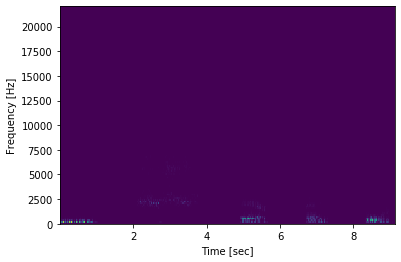

In [6]:
plt.pcolormesh(times, frequencies, spectrogram, shading='auto')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

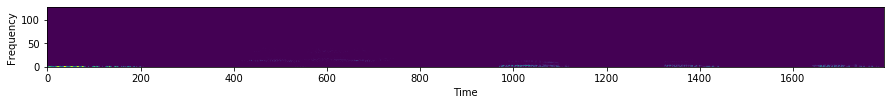

In [7]:
plt.rcParams["figure.figsize"] = (15,3)
plt.imshow(spectrogram, origin='lower')
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.show()

In [8]:
np.save("spectrogram.npy", spectrogram)

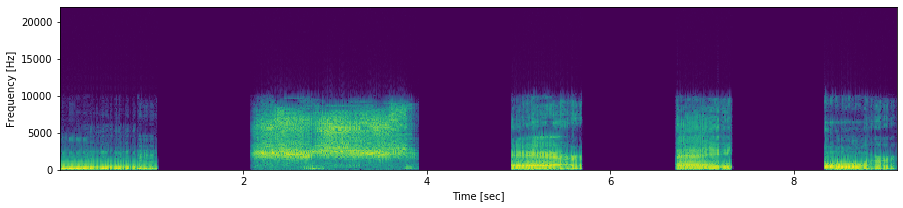

In [9]:
log_spectrogram = np.log(spectrogram+0.0001)

plt.pcolormesh(times, frequencies, log_spectrogram, shading='auto')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

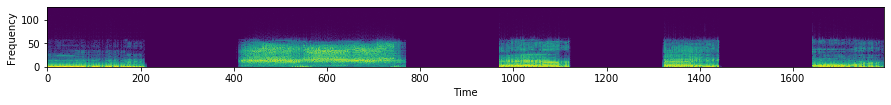

In [10]:
plt.rcParams["figure.figsize"] = (15,3)
plt.imshow(log_spectrogram, origin='lower')
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.show()

In [11]:
np.save("log_spectrogram.npy", log_spectrogram)